In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import joblib

**Data Loading from csv**

In [2]:
df = pd.read_csv('house_prices.csv')
df.head()

,size_sqft,bedrooms,age,location,price
0,3774,4,5,Chennai,225.35
1,1460,5,25,Hyderabad,100.74
2,1894,2,3,Chennai,119.52
3,1730,4,18,Delhi,148.66
4,1695,2,19,Bangalore,127.84


*from the data we could see that location is not a numeric data so we should encode them to help the model predict price according to data we would be using one hot encoding for this*

**Data Preprocessing**

In [3]:
# One-hot encode location
df = pd.get_dummies(df, columns=['location'], drop_first=True)

# Drop rows with missing values
df = df.dropna()

# Separate features and target
X = df.drop(columns=['price'])
y = df['price']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the scaler for later use
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

*Lets see our data now*

In [4]:
df.head()

,size_sqft,bedrooms,age,price,location_Chennai,location_Delhi,location_Hyderabad,location_Kochi
0,3774,4,5,225.35,True,False,False,False
1,1460,5,25,100.74,False,False,True,False
2,1894,2,3,119.52,True,False,False,False
3,1730,4,18,148.66,False,True,False,False
4,1695,2,19,127.84,False,False,False,False


**Train Test Split**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

**Model Creation & Training**

In [6]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=['mae'])
model.summary()

model.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 28279.7168 - mae: 155.6300 - val_loss: 32748.9121 - val_mae: 166.7777
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27086.7637 - mae: 152.3443 - val_loss: 32545.3555 - val_mae: 166.1314
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28297.0195 - mae: 153.8878 - val_loss: 32294.0371 - val_mae: 165.3492
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27609.0078 - mae: 152.4185 - val_loss: 31958.7188 - val_mae: 164.3287
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26983.4922 - mae: 151.2415 - val_loss: 31500.6465 - val_mae: 162.9431
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27568.4824 - mae: 150.5562 - val_loss: 30884.9941 - val_mae: 161.0947
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27055.9434 - mae: 150.0097 - val_loss: 30090.8086 - val_mae: 158.6971
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25244.7500 - mae: 144.4183 - val_loss

**Evaluation of the Trained model**

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 91.9111 - mae: 7.7157 
Test MAE: 7.48
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


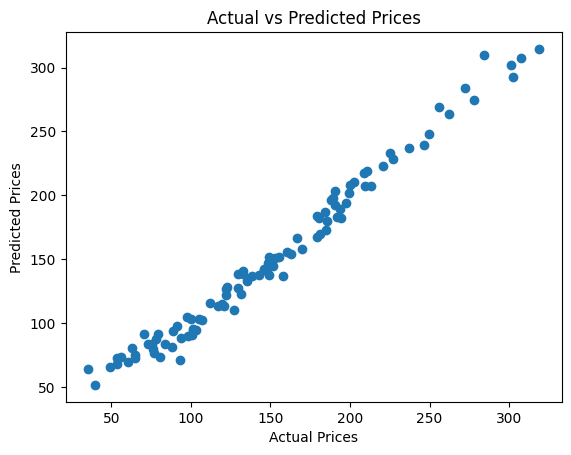

In [7]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")

# Predictions
y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Save the model
model.save('house_price_model.h5')

**Predicting our new Input taking from user**

In [8]:
# Load model and scaler
model = tf.keras.models.load_model('house_price_model.h5')
scaler = joblib.load('scaler.pkl')

# Get the column order for dummy variables
feature_columns = X.columns.tolist()

# Manual input
size_sqft = float(input("Enter size in sqft: "))
bedrooms = int(input("Enter number of bedrooms: "))
age = int(input("Enter age of house in years: "))
location = input("Enter location (e.g., Chennai, Delhi, Hyderabad, Kochi): ").strip()

# Build input dictionary
input_dict = {
    'size_sqft': size_sqft,
    'bedrooms': bedrooms,
    'age': age,
    'location_Chennai': False,
    'location_Delhi': False,
    'location_Hyderabad': False,
    'location_Kochi': False
}

# Set correct location flag (if exists)
loc_col = f'location_{location}'
if loc_col in input_dict:
    input_dict[loc_col] = True
else:
    print(f"⚠️ Warning: '{location}' not found in training locations. Defaulting to all False.")

# Convert to DataFrame with the same column order
sample_df = pd.DataFrame([input_dict])[feature_columns]

# Scale features
sample_scaled = scaler.transform(sample_df)

# Predict
predicted_price = model.predict(sample_scaled)[0][0]
print(f"\n🏠 Predicted House Price: {predicted_price:.2f} Lakhs")

Enter size in sqft: 1800
Enter number of bedrooms: 3
Enter age of house in years: 3
Enter location (e.g., Chennai, Delhi, Hyderabad, Kochi): Chennai
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

🏠 Predicted House Price: 113.34 Lakhs
